In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


In [3]:
class SOM():
    
    def __init__(self, teachers, N, times, seed=None,):
        self.teachers = np.array(teachers) #teacher関数の作成(入力データを教えてくれる)
        self.n_teacher = self.teachers.shape[0] #おそらく、teacherのデータ数
        self.N = N #マップの大きさ
        self.times = times #学習回数
        if not seed is None:
            np.random.seed(seed) #seedが指定されていれば、seedを取得
            
        x, y = np.meshgrid(range(self.N), range(self.N)) # xは、[0,1,2,...19]が20個　yは、[0,0,0,...,0][1,1,1,1...,1]を19まで
        self.c = np.hstack((x.flatten()[:, np.newaxis],
                            y.flatten()[:, np.newaxis]))#xとyを合わせて座標軸の作成array[[0,1],[0,2],...,[19,19]]
        self.nodes = teachers#19*19の三値の乱数を作成
    
    
        #W(t+1)=W(t)+Φ(t)L(t)(V(t)-W(t))
        
    def train(self):
        for var in range(self.times):
            np.random.shuffle(self.teachers)
            for i, teacher in enumerate(self.teachers): #self.techers の中にある全ての要素をteacherとして取り出し #iはtとして
                bmu = self._best_matching_unit(teacher) #bmuを見つける座標をbmuに格納
                d = np.linalg.norm(self.c - bmu, axis=1) #dの中にはbmuと各点間の距離を格納している
                L = self._learning_ratio(i) #ここの中にL(t)を格納
                S = self._learning_radius(i, d) #ここの中にΦ(t)を格納
                self.nodes += L * S[:, np.newaxis] * (teacher - self.nodes) #W(t)（Sは場所に依存する配列）
        return self.nodes        #compute all norms (square)


    def _best_matching_unit(self, teacher):
        norms = np.linalg.norm(self.nodes - teacher, axis=1) #全てのノードとteacherを比較して、ノルムを計算
        bmu = np.argmin(norms) #argment with minimum element　normsのなかで一番小さいノルムを取得 ここで返すのは、インデックスのみ
        return np.unravel_index(bmu,(self.N, self.N)) #返す値は、インデックス番号がどれに値するかという情報

    #σ(t)
    def _neighbourhood(self, t):#neighbourhood radious 更新するノード数は徐々に減っていく
        halflife = float(self.n_teacher/4) #for testing
        initial  = float(self.N/2) #initial=20/2=10
        return initial*np.exp(-t/halflife) #10exp(-t/250)のレートで下がっていくt=0で10,t=250で5
    
    #L(t)
    def _learning_ratio(self, t): #learning関数
        halflife = float(self.n_teacher/4) #for testing
        initial  = 0.1
        return initial*np.exp(-t/halflife) #初期の更新係数は0.1そこから、だんだん更新度合いは減少していく
    
    #Φ(t)=exp((-dist^2)/(2σ^2(t)))
    #distはBMUからの距離でいい
    def _learning_radius(self, t, d):
        # d is distance from BMU
        s = self._neighbourhood(t) #sは、時間tの近傍半径
        return np.exp(-d**2/(2*s**2))  #近傍関数の値を返す（近ければ近いほど、大きい）Sも配列になる
    

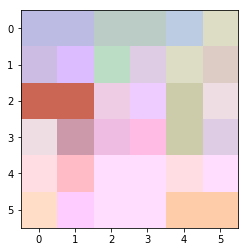

array([[[ 0.2       ,  0.2       ,  0.66666667,  0.33333333],
        [ 0.2       ,  0.2       ,  0.66666667,  0.33333333],
        [ 0.2       ,  0.4       ,  0.33333333,  0.33333333],
        [ 0.2       ,  0.4       ,  0.33333333,  0.33333333],
        [ 0.2       ,  0.4       ,  0.66666667,  0.33333333],
        [ 0.6       ,  0.6       ,  0.33333333,  0.33333333]],

       [[ 0.4       ,  0.2       ,  0.66666667,  0.33333333],
        [ 0.6       ,  0.2       ,  1.        ,  0.33333333],
        [ 0.2       ,  0.6       ,  0.33333333,  0.33333333],
        [ 0.6       ,  0.4       ,  0.66666667,  0.33333333],
        [ 0.6       ,  0.6       ,  0.33333333,  0.33333333],
        [ 0.6       ,  0.4       ,  0.33333333,  0.33333333]],

       [[ 0.8       ,  0.4       ,  0.33333333,  1.        ],
        [ 0.8       ,  0.4       ,  0.33333333,  1.        ],
        [ 0.8       ,  0.4       ,  0.66666667,  0.33333333],
        [ 0.8       ,  0.4       ,  1.        ,  0.33333333],
    

In [4]:
input_data=np.loadtxt("C:\Users\Tomomu-Iwai\Downloads\sampledataset3.csv",delimiter=",")
teachers = input_data[0:36]
#np.random.shuffle(teachers)
N = 6
som = SOM(teachers, N=6, times=10, seed=10)
# Initial map
plt.imshow(som.nodes.reshape((N, N, 4)),
           interpolation='none')
plt.show()
som.nodes.reshape((N, N, 4))

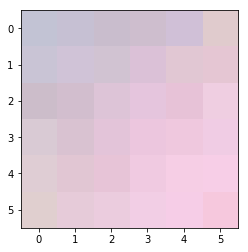

array([[ 0.3451169 ,  0.3523282 ,  0.5386578 ,  0.36176607],
       [ 0.41920772,  0.35496868,  0.55000242,  0.38104779],
       [ 0.49200495,  0.37858689,  0.52599946,  0.4119108 ],
       [ 0.53909315,  0.38726493,  0.53561772,  0.41555951],
       [ 0.55854154,  0.40053994,  0.62056458,  0.41432686],
       [ 0.70102456,  0.49509752,  0.51765632,  0.40068427],
       [ 0.43064108,  0.36539811,  0.54944121,  0.3661613 ],
       [ 0.50708852,  0.37239337,  0.59092838,  0.37520264],
       [ 0.54885728,  0.41161307,  0.55570846,  0.39420538],
       [ 0.65740401,  0.40679772,  0.6130084 ,  0.40491985],
       [ 0.7166359 ,  0.46096214,  0.58014155,  0.40299305],
       [ 0.74751366,  0.43749517,  0.57025164,  0.39218351],
       [ 0.53822784,  0.40689042,  0.52556978,  0.43217002],
       [ 0.59231512,  0.41508839,  0.55479899,  0.42850083],
       [ 0.67101108,  0.42417556,  0.61197354,  0.39802317],
       [ 0.74862509,  0.43975817,  0.6775609 ,  0.40184655],
       [ 0.81254767,  0.

In [29]:
# Train
som.train()

# Trained MAP
plt.imshow(som.nodes.reshape((N, N, 4)),
           interpolation='none')
plt.show()
som.nodes

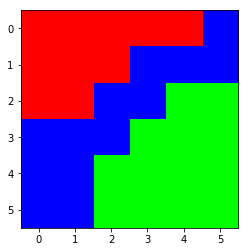

In [30]:
pred = KMeans(n_clusters=3).fit_predict(som.nodes)
best_place = []
gateway = [1.0,0.0,0.0]
router = [0.0,1.0,0.0]
cloud = [0.0,0.0,1.0]

for i, pre in enumerate(pred):
    if pre == 0:
        best_place.append(gateway)
    if pre == 1:
        best_place.append(router)
    if pre == 2:
        best_place.append(cloud)

best_place = np.array(best_place)
plt.imshow(best_place.reshape((N, N, 3)),
           interpolation='none')

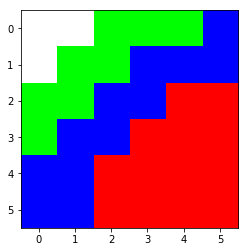

In [31]:
pred = KMeans(n_clusters=4).fit_predict(som.nodes)
best_place = []
gateway = [1.0,0.0,0.0]
router = [0.0,1.0,0.0]
cloud = [0.0,0.0,1.0]
aaa = [1.0,1.0,1.0]
for i, pre in enumerate(pred):
    if pre == 0:
        best_place.append(gateway)
    if pre == 1:
        best_place.append(router)
    if pre == 2:
        best_place.append(cloud)
    if pre == 3:
        best_place.append(aaa)
best_place = np.array(best_place)
plt.imshow(best_place.reshape((N, N, 3)),
           interpolation='none')

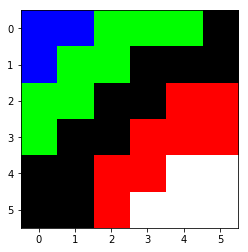

In [32]:
pred = KMeans(n_clusters=5).fit_predict(som.nodes)
best_place = []
gateway = [1.0,0.0,0.0]
router = [0.0,1.0,0.0]
cloud = [0.0,0.0,1.0]
aaa = [1.0,1.0,1.0]
bbb = [0.0,0.0,0.0]
for i, pre in enumerate(pred):
    if pre == 0:
        best_place.append(gateway)
    if pre == 1:
        best_place.append(router)
    if pre == 2:
        best_place.append(cloud)
    if pre == 3:
        best_place.append(aaa)
    if pre == 4:
        best_place.append(bbb)
best_place = np.array(best_place)
plt.imshow(best_place.reshape((N, N, 3)),
           interpolation='none')

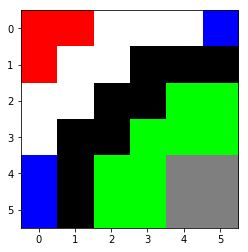

In [33]:
pred = KMeans(n_clusters=6).fit_predict(som.nodes)
best_place = []
gateway = [1.0,0.0,0.0]
router = [0.0,1.0,0.0]
cloud = [0.0,0.0,1.0]
aaa = [1.0,1.0,1.0]
bbb = [0.0,0.0,0.0]
ccc = [0.5,0.5,0.5]
for i, pre in enumerate(pred):
    if pre == 0:
        best_place.append(gateway)
    if pre == 1:
        best_place.append(router)
    if pre == 2:
        best_place.append(cloud)
    if pre == 3:
        best_place.append(aaa)
    if pre == 4:
        best_place.append(bbb)
    if pre == 5:
        best_place.append(ccc)
best_place = np.array(best_place)
plt.imshow(best_place.reshape((N, N, 3)),
           interpolation='none')

In [34]:
input_data=np.loadtxt("C:\Users\Tomomu-Iwai\Downloads\sampledataset3.csv",delimiter=",")
input_data = input_data[0:36]
bmus = []
for i, node in enumerate(som.nodes):
    norms = np.linalg.norm(input_data - node, axis=1)
    bmus.append(np.argmin(norms))

In [35]:
bmps = []
gateway = [1.0,0.0,0.0]
router = [0.0,1.0,0.0]
cloud = [0.0,0.0,1.0]
for i, bmu in enumerate(bmus):
    if bmu >= 0 and bmu <=11:
        bmps.append(gateway)
    if bmu >= 12 and bmu <=23:
        bmps.append(router)
    if bmu >= 24 and bmu <=35:
        bmps.append(cloud)

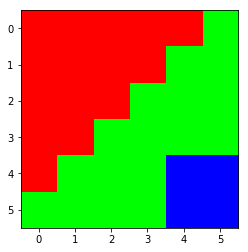

In [36]:
hello = np.array(bmps)
plt.imshow(hello.reshape((N, N, 3)),
           interpolation='none')

In [37]:
most_cloud = [1.0,1.0,1.0,1.0]
norms = np.linalg.norm(som.nodes - most_cloud, axis=1)
print(np.argmin(norms))
print(norms)

35
[ 1.21182911  1.15714508  1.10215182  1.07009391  1.02040296  0.9675472
  1.15396875  1.09296072  1.05551458  0.98648053  0.95055533  0.96658449
  1.05476416  1.01643681  0.97608817  0.91586831  0.79663369  0.84508289
  1.01970997  0.93715669  0.91593269  0.87125876  0.77610093  0.81881797
  0.97540513  0.90096791  0.83471022  0.80328892  0.77170247  0.72791834
  0.92789454  0.90257385  0.83132764  0.78798641  0.72187547  0.62603618]


In [38]:
most_gateway = [0.0,0.0,0.0,0.0]
norms = np.linalg.norm(som.nodes - most_gateway, axis=1)
print(np.argmin(norms))
print(norms)

0
[ 0.81502623  0.86570084  0.91199937  0.94877373  1.01447919  1.07938545
  0.8688655   0.94116362  0.96689162  1.06649135  1.10680654  1.10868099
  0.95825025  1.00724896  1.07847802  1.17234645  1.27572619  1.27904414
  1.01168089  1.09862701  1.15640629  1.24133019  1.33259593  1.31573905
  1.07149955  1.15040356  1.24027687  1.31998226  1.38114569  1.43024261
  1.1161241   1.17023177  1.26726702  1.35449933  1.43151974  1.47728226]


In [39]:
cloud_closeness = []
norms = norms/norms[35]
for i, norm in enumerate(norms):
    closeness = [0.0,0.0]
    closeness.append(norm)
    cloud_closeness.append(closeness)
cloud_closeness

[[0.0, 0.0, 0.55170650175227265],
 [0.0, 0.0, 0.58600909635337006],
 [0.0, 0.0, 0.61734943544281029],
 [0.0, 0.0, 0.64224269043044857],
 [0.0, 0.0, 0.68671994492339739],
 [0.0, 0.0, 0.73065620392506747],
 [0.0, 0.0, 0.58815131096770323],
 [0.0, 0.0, 0.63709126235530911],
 [0.0, 0.0, 0.6545070289510091],
 [0.0, 0.0, 0.721927947034394],
 [0.0, 0.0, 0.74921805517172024],
 [0.0, 0.0, 0.75048690087711656],
 [0.0, 0.0, 0.64865752054802606],
 [0.0, 0.0, 0.68182566185608751],
 [0.0, 0.0, 0.73004194681511381],
 [0.0, 0.0, 0.79358324480937903],
 [0.0, 0.0, 0.86356292360951648],
 [0.0, 0.0, 0.86580890501654462],
 [0.0, 0.0, 0.68482571930789582],
 [0.0, 0.0, 0.74368117863371141],
 [0.0, 0.0, 0.78279304935557326],
 [0.0, 0.0, 0.84027962820028301],
 [0.0, 0.0, 0.90205911570672648],
 [0.0, 0.0, 0.89064837561722854],
 [0.0, 0.0, 0.72531809022075755],
 [0.0, 0.0, 0.77872969271598635],
 [0.0, 0.0, 0.83956661351483253],
 [0.0, 0.0, 0.89352068668506202],
 [0.0, 0.0, 0.93492335278681737],
 [0.0, 0.0, 0.968

In [40]:
'cloud_closeness = np.array(cloud_closeness)
plt.imshow(cloud_closeness.reshape((N, N, 3)),interpolation='none')

SyntaxError: EOL while scanning string literal (<ipython-input-40-b510089d7be4>, line 1)

# 層構造のトポロジーにおいて、どの層に配置すべきかは推定できる
⇒　層依存の入力はSOMとk-meansを用いて、分類・決定

# 層内のノード選択は、AHPで行う？?

bandwidth
対象人数
セッション数
メンテナンス方法
adminサービス管理頻度
admin人数
同時に接続する数

寺岡研